In [65]:
import numpy
import os
import re
import altair
import pandas as pd
altair.renderers.enable('notebook')
altair.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [66]:
carriers = pd.read_csv("carriers_US.csv") 

In [67]:
carriers_filtered = pd.DataFrame({'carrier_name': carriers['UNIQUE_CARRIER_NAME'],'ramp_minus_air': carriers['RAMP_TO_RAMP'] - carriers['AIR_TIME']})


In [68]:
print(carriers_filtered.head())

           carrier_name  ramp_minus_air
0  Delta Air Lines Inc.              75
1  Delta Air Lines Inc.              17
2  Delta Air Lines Inc.              22
3  Delta Air Lines Inc.              33
4  Delta Air Lines Inc.              18


In [69]:
carriers_filtered = carriers_filtered.groupby(['carrier_name']).mean()
print(carriers_filtered.head())

                                                    ramp_minus_air
carrier_name                                                      
40-Mile Air                                              25.355140
ABX Air Inc                                             233.427512
ADVANCED AIR, LLC                                        49.427549
Aerodynamics Inc. d/b/a SkyValue d/b/a SkyValue...       86.396825
Air Charter, Inc d/b/a Air Flamenco                      99.938525


In [72]:
carriers_filtered["ramp_minus_air"] = pd.to_numeric(carriers_filtered["ramp_minus_air"])

In [73]:
print(type(carriers_filtered))

<class 'pandas.core.frame.DataFrame'>


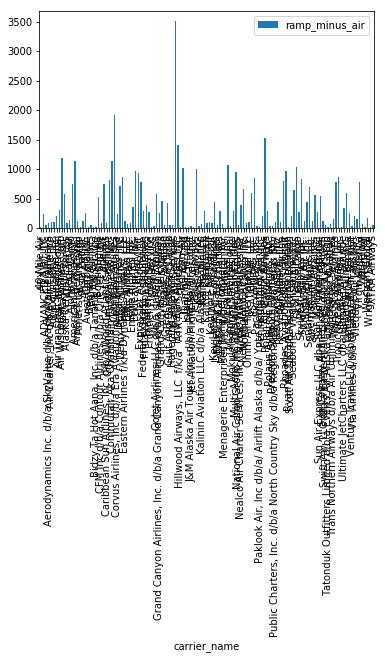

In [76]:
carriers_filtered.plot(kind='bar')